# Gender Recognition by Voice and Speech Analysis

## Objective:
The objective of this project to build a classification model using Support Vector Machine algorithm to identify a voice as male or female, based upon acoustic properties of the voice and speech data 

## Approach/Activities:
This exercise includes exploration of voice and speech data including data cleaning, data standardization, correlation analysis,
performing K-fold cross validation, Support Vector machine with different kernels(linear,gaussian,polynomial) and tuning the various parameters such as C ,gamma and degree to find out the best performing model

## Data Set Information
This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. Data source:

https://www.kaggle.com/primaryobjects/voicegender

The following acoustic properties of each voice are measured and included within the CSV:

meanfreq: mean frequency (in kHz)

sd: standard deviation of frequency

median: median frequency (in kHz)

Q25: first quantile (in kHz)

Q75: third quantile (in kHz)

IQR: interquantile range (in kHz)

skew: skewness (see note in specprop description)

kurt: kurtosis (see note in specprop description)

sp.ent: spectral entropy

sfm: spectral flatness

mode: mode frequency

centroid: frequency centroid (see specprop)

peakf: peak frequency (frequency with highest energy)

meanfun: average of fundamental frequency measured across acoustic signal

minfun: minimum fundamental frequency measured across acoustic signal

maxfun: maximum fundamental frequency measured across acoustic signal

meandom: average of dominant frequency measured across acoustic signal

mindom: minimum of dominant frequency measured across acoustic signal

maxdom: maximum of dominant frequency measured across acoustic signal

dfrange: range of dominant frequency measured across acoustic signal

modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

label: male or female

# Library Importing and data file Reading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# read files
df = pd.read_csv("voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Exploratory Data Analysis (EDA)

In [6]:
df.shape


(3168, 21)

In [7]:
df.index

RangeIndex(start=0, stop=3168, step=1)

In [8]:
df.columns 

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [9]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


In [13]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


## Missing Values Treatment

In [10]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [12]:
#Correlation between each feature
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


## Correlation Matrix (heatmap style)- Between features

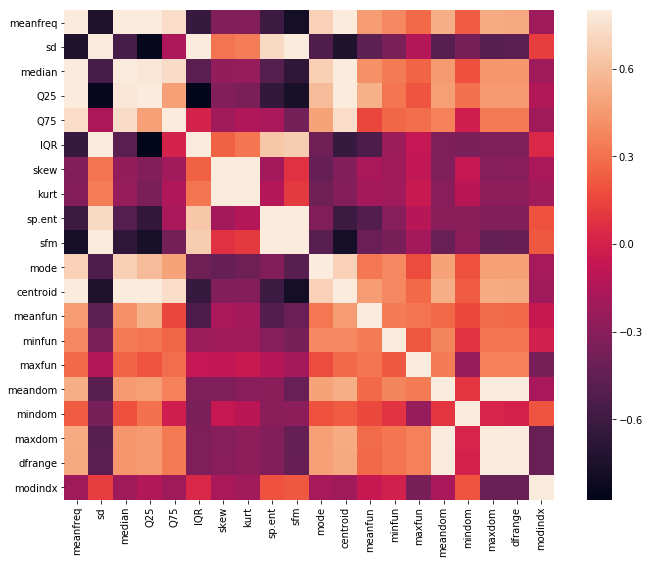

In [11]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## Separating features and labels

In [14]:
X=df.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


## Converting string value to int type for labels

In [16]:
# Encode label category
# male -> 1
# female -> 0
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Data Standardisation

In [17]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Building SVM Models

## Splitting dataset into training set and testing set for better generalisation

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Running SVM with default hyperparameter

In [19]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


## Default Linear kernel

In [21]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9779179810725552


## Default RBF kernel

In [22]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


## Default Polynomial kernel

In [23]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9589905362776026


# Performing K-fold cross validation with different kernels

## CV on Linear kernel

In [24]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

D:\Development_Avecto\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0.91194969 0.97169811 0.97169811 0.97169811 0.96202532 0.98734177
 0.99050633 0.98101266 0.95253165 0.99367089]


In [25]:
print(scores.mean())

0.9694132632752168


## CV on rbf kernel

In [26]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.93396226 0.95597484 0.96855346 0.9591195  0.96835443 0.99683544
 0.98734177 0.98101266 0.91455696 0.99367089]


In [27]:
print(scores.mean())

0.9659382214791815


## CV on Polynomial kernel

In [28]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.89937107 0.94654088 0.93081761 0.91509434 0.95886076 1.
 0.98101266 0.96835443 0.87974684 0.9778481 ]


In [29]:
print(scores.mean())

0.9457646684181196


# Checking accuracy scores by varying C parameter values with kernel as linear

## Checking accuracy for C from 1 to 25

In [30]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.9694132632752168, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9690987978664118, 0.9694132632752168, 0.9690987978664118, 0.9687843324576069, 0.9684698670488018, 0.9684698670488018, 0.9684698670488018, 0.9681534113525991, 0.9681534113525991, 0.9681534113525991, 0.9678369556563966, 0.9684678767614043, 0.9681534113525991, 0.9681534113525991, 0.9681534113525991, 0.9678369556563966, 0.9681514210652018, 0.9684678767614043, 0.9684678767614043, 0.9681514210652018, 0.9681514210652018]


Text(0,0.5,'Cross-Validated Accuracy')

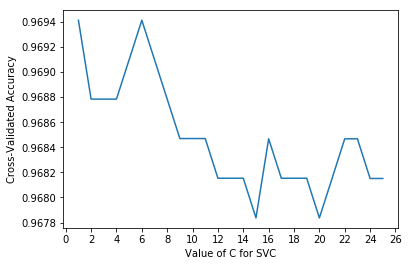

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

#### From the above plot we can see that accuracy has been close to 97% for C=1 and C=6 and then it drops around 96.8% and remains constant

## Finding what is the exact value of C which is giving us a good accuracy score

In [32]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   

[0.9700481649550194, 0.9691007881538095, 0.9690987978664118, 0.9690987978664118, 0.9694132632752168, 0.9694132632752168, 0.9697277286840219, 0.9694112729878194, 0.9690968075790144, 0.9694132632752168, 0.9694132632752168, 0.9694132632752168, 0.9694132632752168, 0.9687823421702095, 0.9690987978664118, 0.9690987978664118, 0.9690987978664118, 0.9690987978664118, 0.9687843324576069, 0.9687843324576069, 0.9690987978664118, 0.9690987978664118, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9690987978664118, 0.9690987978664118, 0.9690987978664118, 0.9690987978664118,

Text(0,0.5,'Cross-Validated Accuracy')

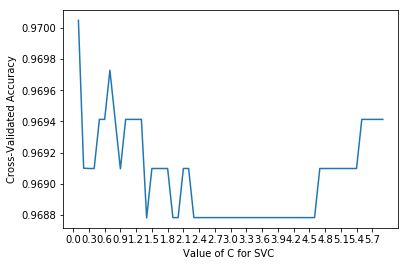

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

#### Accuracy score is highest for C=0.1.

# Checking accuracy with  kernel as rbf and with different values gamma

#### Gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. Lower gamma value -->higher the variance and Larger gamma value -->smaller variance

In [34]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.8878114799777087, 0.9552463975798107, 0.9681514210652018, 0.9630960910755512, 0.9072366849773108, 0.5955377756548046, 0.5]


Text(0,0.5,'Cross-Validated Accuracy')

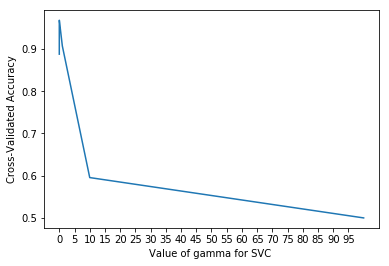

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

#### From above graph, for gamma=10 and 100 the kernel is performing poorly. Also, there is a slight dip in accuracy score when gamma is 1.

### Checking accuracy for the gamma range 0.0001 to 0.1

In [36]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.8878114799777087, 0.9552463975798107, 0.9681514210652018, 0.9630960910755512]


Text(0,0.5,'Cross-Validated Accuracy')

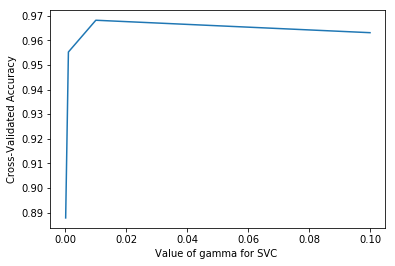

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

##### The score increases steadily and raches its peak at 0.01 and then decreases till gamma=0.1. Thus Gamma should be around 0.01

### Checking accuracy for the gamma range 0.0001 to 0.1

In [38]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   

[0.9681514210652018, 0.9678389459437945, 0.9678349653689992, 0.9668895788551864, 0.9659382214791815]


Text(0,0.5,'Cross-Validated Accuracy')

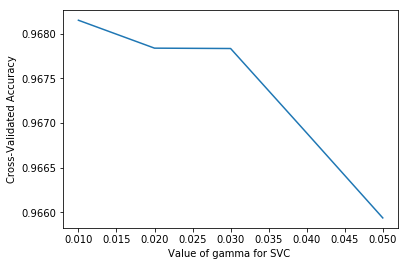

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

#### From above plot, there is constant decrease in the accuracy score as gamma value increase.Thus gamma=0.01 is the best parameter.

# Checking accuracy for polynomial kernel with different degree


In [41]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.8506926200143299, 0.9457646684181196, 0.8312116869675981, 0.8659820078019266, 0.7747571849375049]


Text(0,0.5,'Cross-Validated Accuracy')

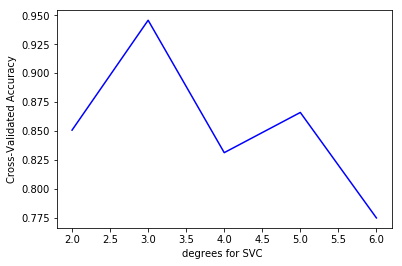

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='b')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

#### From above plot, score is high for third degree polynomial and then there is drop in the accuracy score as degree of polynomial increases. Thus increase in polynomial degree results in high complexity of the model and thus causes overfitting

# SVM by taking hyperparameter C=0.1 and kernel as linear

In [44]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9747634069400631


## With K-fold cross validation(where K=10)

In [45]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='linear',C=0.1)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

[0.90880503 0.97169811 0.97484277 0.96855346 0.96202532 0.99050633
 0.99050633 0.98101266 0.95886076 0.99367089]


In [46]:
print(scores.mean())

0.9700481649550194


##### The accuracy is slightly good without K-fold cross validation but it may fail to generalise the unseen data. Hence it is advisable to perform K-fold cross validation where all the data is covered so it may predict unseen data well

# SVM by taking hyperparameter  gamma=0.01 and kernel as rbf

In [47]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=0.01)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.9668769716088328

## With K-fold cross validation(where K=10)


In [50]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='rbf',gamma=0.01)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

[0.92138365 0.94654088 0.97798742 0.97484277 0.95886076 0.99683544
 0.99050633 0.98417722 0.93670886 0.99367089]


In [51]:
print(scores.mean())

0.9681514210652018


# SVM by taking hyperparameter degree=3 and kernel as poly

In [52]:
from sklearn.svm import SVC
svc= SVC(kernel='poly',degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9589905362776026


## With K-fold cross validation(where K=10)

In [53]:
svc=SVC(kernel='poly',degree=3)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.89937107 0.94654088 0.93081761 0.91509434 0.95886076 1.
 0.98101266 0.96835443 0.87974684 0.9778481 ]
0.9457646684181196


# Finding the best parameter through Grid search technique 

In [55]:
from sklearn.svm import SVC
svm_model= SVC()

In [56]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [57]:
from sklearn.grid_search import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

D:\Development_Avecto\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [58]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.9569850039463299


In [61]:
print(model_svm.grid_scores_)

[mean: 0.72612, std: 0.02657, params: {'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}, mean: 0.66732, std: 0.01472, params: {'C': 0.1, 'degree': 2, 'gamma': 0.02, 'kernel': 'poly'}, mean: 0.73639, std: 0.02183, params: {'C': 0.1, 'degree': 2, 'gamma': 0.03, 'kernel': 'poly'}, mean: 0.79242, std: 0.02043, params: {'C': 0.1, 'degree': 2, 'gamma': 0.04, 'kernel': 'poly'}, mean: 0.82952, std: 0.02263, params: {'C': 0.1, 'degree': 2, 'gamma': 0.05, 'kernel': 'poly'}, mean: 0.57893, std: 0.01547, params: {'C': 0.1, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}, mean: 0.88477, std: 0.01732, params: {'C': 0.1, 'degree': 3, 'gamma': 0.02, 'kernel': 'poly'}, mean: 0.89266, std: 0.01393, params: {'C': 0.1, 'degree': 3, 'gamma': 0.03, 'kernel': 'poly'}, mean: 0.90489, std: 0.01413, params: {'C': 0.1, 'degree': 3, 'gamma': 0.04, 'kernel': 'poly'}, mean: 0.92305, std: 0.01402, params: {'C': 0.1, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}, mean: 0.52013, std: 0.00624, params: {'C': 0.1, '

In [59]:
print(model_svm.best_params_)

{'C': 0.9, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}


In [62]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9589905362776026
